## Method B

Algorithm Implementation -
Select at least Two Papers and reimplement the method proposed in the papers. Let's call them Method A and Method B. 

 -  Option 1: Implement the algorithm from scratch.
 - Option 2: Use the code provided by the authors (if available) and modify or analyze it as needed.
        (Ensure your implementation can adapt to the ECG5000 dataset.)
    - Document your implementation process and any challenges faced.

Evaluation -
Evaluate the algorithm’s performance using appropriate metrics (e.g., accuracy, sensitivity, specificity).
Compare the performance of your Methods A and B with KNN (you can call it Method C).

Method B Paper: https://onlinelibrary.wiley.com/doi/10.1155/2021/6649970

In [2]:
# Load & Preprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from ecgLoader import load_ecg5000  # ✅ Use your existing loader

from tensorflow.keras import layers, models, Input


X_train, X_test, y_train, y_test = load_ecg5000(one_hot=True)
X_train = X_train[..., np.newaxis]  # shape (samples, 140, 1)
X_test = X_test[..., np.newaxis]


Applied one-hot encoding: (3998, 5)


In [3]:
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    x = layers.Conv1D(filters, kernel_size, padding='same', strides=stride)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv1D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)

    if shortcut.shape[-1] != x.shape[-1]:
        shortcut = layers.Conv1D(filters, kernel_size=1, padding='same')(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

def build_resnet_model(input_shape=(140, 1), num_classes=5):
    inputs = Input(shape=input_shape)
    x = layers.Conv1D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size=3, strides=2, padding='same')(x)

    x = residual_block(x, 64)
    x = residual_block(x, 128)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
model = build_resnet_model()
model.summary()

history = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=64)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 140, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 70, 64)    │        512 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 70, 64)    │        256 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 70, 64)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 35, 64)    │          0 │ re_lu[0][0]       │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 35, 64)    │     12,352 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 64)    │        256 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 35, 64)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 35, 64)    │     12,352 │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 64)    │        256 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 35, 64)    │          0 │ batch_normalizat… │
│                     │                   │            │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 35, 64)    │          0 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 35, 128)   │     24,704 │ re_lu_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 128)   │        512 │ conv1d_3[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 35, 128)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 35, 128)   │     49,280 │ re_lu_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 128)   │        512 │ conv1d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 35, 128)   │      8,320 │ re_lu_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 35, 128)   │          0 │ batch_normalizat… │
│                     │                   │            │ conv1d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_4 (ReLU)      │ (None, 35, 128)   │          0 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 117,893 (460.52 KB)

 Trainable params: 116,997 (457.02 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7421 - loss: 0.8326 - val_accuracy: 0.4087 - val_loss: 0.9646
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9701 - loss: 0.0904 - val_accuracy: 0.4087 - val_loss: 1.5137
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9883 - loss: 0.0462 - val_accuracy: 0.4350 - val_loss: 0.8602
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9895 - loss: 0.0336 - val_accuracy: 0.4087 - val_loss: 2.2566
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9845 - loss: 0.0439 - val_accuracy: 0.4137 - val_loss: 1.8311
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9925 - loss: 0.0229 - val_accuracy: 0.8712 - val_loss: 0.2978
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9883 - loss: 0.0319 - val_accuracy: 0.8163 - val_loss: 0.4613
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9885 - loss: 0.0349 - val_accuracy: 0.9588 - v

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       591
           4       0.91      1.00      0.96       409

    accuracy                           0.96      1000
   macro avg       0.96      0.97      0.96      1000
weighted avg       0.97      0.96      0.96      1000



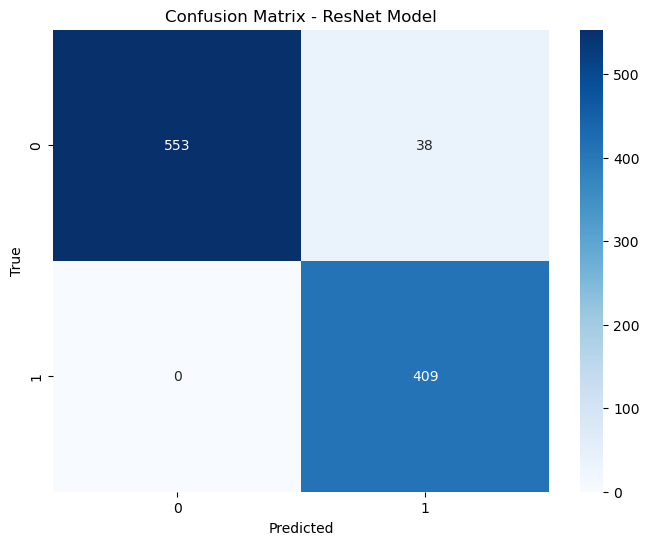

In [5]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print(classification_report(y_true_labels, y_pred_labels))

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - ResNet Model')
plt.show()

## Let's try another dataset

In [6]:
from ecgLoader import load_heartbeat_dataset

X_train, X_test, y_train, y_test = load_heartbeat_dataset(one_hot=True)


X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(X_train.shape, y_train.shape)

(87556, 187, 1, 1) (87556, 5)


In [7]:
def build_resnet_model_heartbeat(input_shape=(187, 1), num_classes=5):
    inputs = Input(shape=input_shape)
    x = layers.Conv1D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size=3, strides=2, padding='same')(x)

    x = residual_block(x, 64)
    x = residual_block(x, 128)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
model = build_resnet_model_heartbeat()
model.summary()

history = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=64)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 187, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 94, 64)    │        512 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 94, 64)    │        256 │ conv1d_6[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_5 (ReLU)      │ (None, 94, 64)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 47, 64)    │          0 │ re_lu_5[0][0]     │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 47, 64)    │     12,352 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 47, 64)    │        256 │ conv1d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_6 (ReLU)      │ (None, 47, 64)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 47, 64)    │     12,352 │ re_lu_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 47, 64)    │        256 │ conv1d_8[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 47, 64)    │          0 │ batch_normalizat… │
│                     │                   │            │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_7 (ReLU)      │ (None, 47, 64)    │          0 │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 47, 128)   │     24,704 │ re_lu_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 47, 128)   │        512 │ conv1d_9[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_8 (ReLU)      │ (None, 47, 128)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 47, 128)   │     49,280 │ re_lu_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 47, 128)   │        512 │ conv1d_10[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 47, 128)   │      8,320 │ re_lu_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 47, 128)   │          0 │ batch_normalizat… │
│                     │                   │            │ conv1d_11[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_9 (ReLU)      │ (None, 47, 128)   │          0 │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 117,893 (460.52 KB)

 Trainable params: 116,997 (457.02 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 86s 65ms/step - accuracy: 0.9004 - loss: 0.3354 - val_accuracy: 0.9214 - val_loss: 0.2702
Epoch 2/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 84s 76ms/step - accuracy: 0.9636 - loss: 0.1302 - val_accuracy: 0.9653 - val_loss: 0.1249
Epoch 3/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 75s 68ms/step - accuracy: 0.9731 - loss: 0.0989 - val_accuracy: 0.9406 - val_loss: 0.1934
Epoch 4/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 101s 92ms/step - accuracy: 0.9751 - loss: 0.0907 - val_accuracy: 0.9744 - val_loss: 0.0920
Epoch 5/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 99s 90ms/step - accuracy: 0.9778 - loss: 0.0787 - val_accuracy: 0.9788 - val_loss: 0.0768
Epoch 6/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 101s 92ms/step - accuracy: 0.9791 - loss: 0.0732 - val_accuracy: 0.9786 - val_loss: 0.0778
Epoch 7/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 121s 110ms/step - accuracy: 0.9801 - loss: 0.0674 - val_accuracy: 0.9782 - val_loss: 0.0829
Epoch 8/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 141s 129ms/step - accuracy: 0.

In [9]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

685/685 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18160
           1       0.92      0.75      0.83       535
           2       0.97      0.97      0.97      1402
           3       0.90      0.71      0.79       158
           4       0.99      0.99      0.99      1635

    accuracy                           0.99     21890
   macro avg       0.95      0.88      0.91     21890
weighted avg       0.99      0.99      0.99     21890



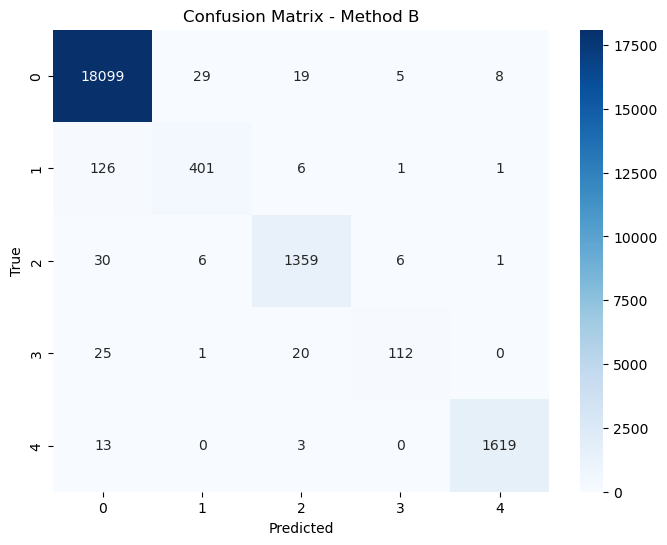

In [10]:
print(classification_report(y_true_labels, y_pred_labels))

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Method B')
plt.show()